In [10]:
X=Y=[]
for line in open('../train.csv'):
    try:
        x,y = line.split(',')
        if x is not None and y is not None:
            X.append(float(x))
            Y.append(float(y))
    except:
        continue
print(len(X),len(Y))

1398 1398


[]

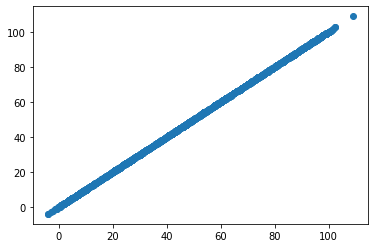

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.plot()

In [12]:
denominator = sum([i*i for i in X])-sum(X)**2/len(X)
a = ((sum([i*j for i,j in zip(X,Y)])-sum(Y)*sum(X)/len(Y)))/denominator
b = ((sum(Y)/len(Y))*sum([x*x for x in X])-sum(X)/len(X)*sum([x*y for x,y in zip(X,Y)]))/denominator

In [21]:
yhat = [a*x for x in X]+b
plt.scatter(X,Y)
plt.plot(X,yhat)
plt.show()

TypeError: can only concatenate list (not "float") to list

In [22]:
[a*x for x in X]+b

TypeError: can only concatenate list (not "float") to list